<a href="https://colab.research.google.com/github/gab-es21/sea-turtles-detection/blob/main/yolov8/01_yolo_v8_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sea Turtle Detection - Yolov8 Tune


## Imports and GPU Check

Check access to GPU.

In [2]:
!pip install nvidia-cuda-runtime-cu12
!pip install cuda-python

!pip install torch==2.1.0+cu121 torchvision==0.16.0+cu121 -f https://download.pytorch.org/whl/torch_stable.html

!pip install roboflow
!pip install -U ultralytics

!pip install python-dotenv
!pip install pickleshare

!nvidia-smi

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ---------------------------------------- 0.0/40.4 kB ? eta -:--:--
     ------------------- ------------------ 20.5/40.4 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 40.4/40.4 kB 478.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/716.2 kB ? eta -:--:--
   ---- ----------------------------------- 81.9/716.2 kB 2.2 MB/s eta 0:00:01
   --------------------------- ------------ 491.5/716.2 kB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 716.2/716.2 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.1.18
    Uninstalling ultralytics-8.1.18:
      Successfully uninstalled ultralytics-8.1.18
Tue Feb 27 13:28:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.84                 Driver Version: 545.84       CUDA Version: 12.3     |
|-

In [3]:
import os
import dotenv

In [4]:
HOME = os.getcwd()
print(HOME)

c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local


## Get Environment Variables from drive


Load the .env file

In [5]:
dotenv.load_dotenv('../yolov8_local/yolov8.env')

True

In [6]:
ROBOFLOW_API_KEY = os.environ.get('ROBOFLOW_API_KEY')
COMET_API_KEY = os.environ.get('COMET_API_KEY')

ROBOFLOW_WORKSPACE = os.environ.get('ROBOFLOW_WORKSPACE')
ROBOFLOW_PROJECT = os.environ.get('ROBOFLOW_PROJECT')

ROBOFLOW_MODEL = os.environ.get('ROBOFLOW_MODEL')
ROBOFLOW_VERSION = os.environ.get('ROBOFLOW_VERSION')

## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [7]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.1.19 🚀 Python-3.11.8 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
Setup complete ✅ (12 CPUs, 31.9 GB RAM, 844.3/1862.2 GB disk)


## Comet

Comet's self-hosted and cloud-based machine learning platform allows data science teams to track, compare, explain, and optimize their experiments and models across the complete ML lifecycle – from training runs to production monitoring.

Data scientists and ML engineers choose the Comet platform because it has the flexibility required for the most iterative data science teams, and it is built to handle the intense demands of enterprise ML at scale.

[Documentation](https://www.comet.com/site/blog/fine-tuning-yolov8-for-image-segmentation-with-comet/)

In [29]:
import comet_ml

os.environ['COMET_API_KEY'] = COMET_API_KEY

comet_ml.init("YOLOv8-With-Comet")

## Model

In [8]:
from roboflow import Roboflow
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace(ROBOFLOW_WORKSPACE).project(ROBOFLOW_PROJECT)
#commented because already made download
#dataset = project.version(ROBOFLOW_VERSION).download(ROBOFLOW_MODEL)

print(ROBOFLOW_VERSION)

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.19, to fix: `pip install ultralytics==8.0.196`
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to Sea-Turtles-Model-6 in yolov8:: 100%|██████████| 5792/5792 [00:01<00:00, 3002.59it/s]

6


Go to sea-turtles-1/data.yaml, and update the last 2 lines to:

```yaml
train: ../train/images
val: ../valid/images
```


If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
                         tune
```

In [9]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.version.cuda)


True
1
12.1


## Custom Training

The purpose of this code block is to train the YOLO v8 object detection model using the specified dataset.


The model will be trained for N epochs, with images resized to 800x800 pixels during training.


The loss curves will be plotted for visualization during the training process.

In [10]:
model = YOLO(f'{HOME}/models/yolov8n.pt')
#model = YOLO(f'{HOME}/models/yolov8s.pt')
#model = YOLO(f'{HOME}/models/yolov8m.pt')

In [11]:
#WORKING FINE
#with comet
results = model.tune(
    #cfg=f'{HOME}\cfg\cfg_nano_tune.yaml',
    #project='YOLOv8-With-Comet',
    data=f'{HOME}\Sea-Turtles-Model-6\data.yaml',
    batch=16,
    save_json=True,
    epochs=50,
    patience=15,
    pretrained=True,
    iterations=50
)

Tuner: Initialized Tuner instance with 'tune_dir=c:\Users\gaby3\Documents\sea-turtles-detection\runs\detect\tune'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/50 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}


Saved c:\Users\gaby3\Documents\sea-turtles-detection\runs\detect\tune\tune_scatter_plots.png
Saved c:\Users\gaby3\Documents\sea-turtles-detection\runs\detect\tune\tune_fitness.png

Tuner: 1/50 iterations complete ✅ (785.49s)
Tuner: Results saved to c:\Users\gaby3\Documents\sea-turtles-detection\runs\detect\tune
Tuner: Best fitness=0.17305 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.26667, 'metrics/recall(B)': 0.66667, 'metrics/mAP50(B)': 0.2754, 'metrics/mAP50-95(B)': 0.16168, 'val/box_loss': 0.10496, 'val/cls_loss': 0.22039, 'val/dfl_loss': 0.04934, 'fitness': 0.17305}
Tuner: Best fitness model is c:\Users\gaby3\Documents\sea-turtles-detection\runs\detect\train
Tuner: Best fitness hyperparameters are printed below.

Printing 'c:\Users\gaby3\Documents\sea-turtles-detection\runs\detect\tune\best_hyperparameters.yaml'

lr0: 0.01
lrf: 0.01
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 3.0
warmup_momentum: 0.8
box: 7.5
cls: 0.5
dfl: 1.5
hsv_h: 0

In [21]:
model.predict(f"{HOME}\sea-turtles-1\/valid\images\/6Aug20156Aug20157RioBeach3KMLanePM20150806surprisebeach3kmlanePMimg_20150807_004848_IMG_9786_NIR_jpg.rf.73c49b0cb9cbfcf2a50000e9ee5f7ae8.jpg", save=True)


image 1/1 c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local\sea-turtles-1\valid\images\6Aug20156Aug20157RioBeach3KMLanePM20150806surprisebeach3kmlanePMimg_20150807_004848_IMG_9786_NIR_jpg.rf.73c49b0cb9cbfcf2a50000e9ee5f7ae8.jpg: 640x640 2 Turtles, 77.0ms
Speed: 39.5ms preprocess, 77.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to YOLOv8-With-Comet\predict


[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'Turtle'}
 orig_img: array([[[234, 253, 250],
         [235, 254, 251],
         [234, 255, 252],
         ...,
         [147, 157, 151],
         [163, 164, 160],
         [176, 173, 169]],
 
        [[232, 251, 248],
         [233, 252, 249],
         [233, 254, 251],
         ...,
         [145, 159, 153],
         [162, 168, 163],
         [177, 178, 174]],
 
        [[232, 251, 248],
         [233, 252, 249],
         [232, 253, 250],
         ...,
         [146, 167, 158],
         [157, 169, 163],
         [171, 178, 173]],
 
        ...,
 
        [[182, 237, 220],
         [185, 240, 223],
         [189, 244, 227],
         ...,
         [145, 194, 162],
         [159, 200, 168],
         [178, 215, 183]],
 
        [[183, 242, 222],
         [182, 241, 221],
         [186, 242, 223],
         ...,
  

In [39]:
# Tune hyperparameters on COCO8 for 30 epochs
#model.tune(data=f'{dataset.location}/data.yaml', epochs=30, iterations=200, optimizer='AdamW', plots=True, save=True, val=True)
model.tune(
        cfg=f'{HOME}\cfg\cfg_nano_tune.yaml',
        use_ray=False,
        epochs=5,
        iterations=3,
        patience=1,
        optimizer='AdamW',
        plots=False,
        save=False,
        val=False
    )

TypeError: YOLO.tune() got an unexpected keyword argument 'cfg'

In [12]:
#!yolo copy-cfg

- [Data Augmentation](https://github.com/ultralytics/ultralytics/blob/fdcf0dd4fda06c4c67bde061fe98f9ddd77b2ea4/ultralytics/utils/tuner.py#L83)
- [Configuration file Doc](https://docs.ultralytics.com/usage/cli/#overriding-default-arguments)

c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local


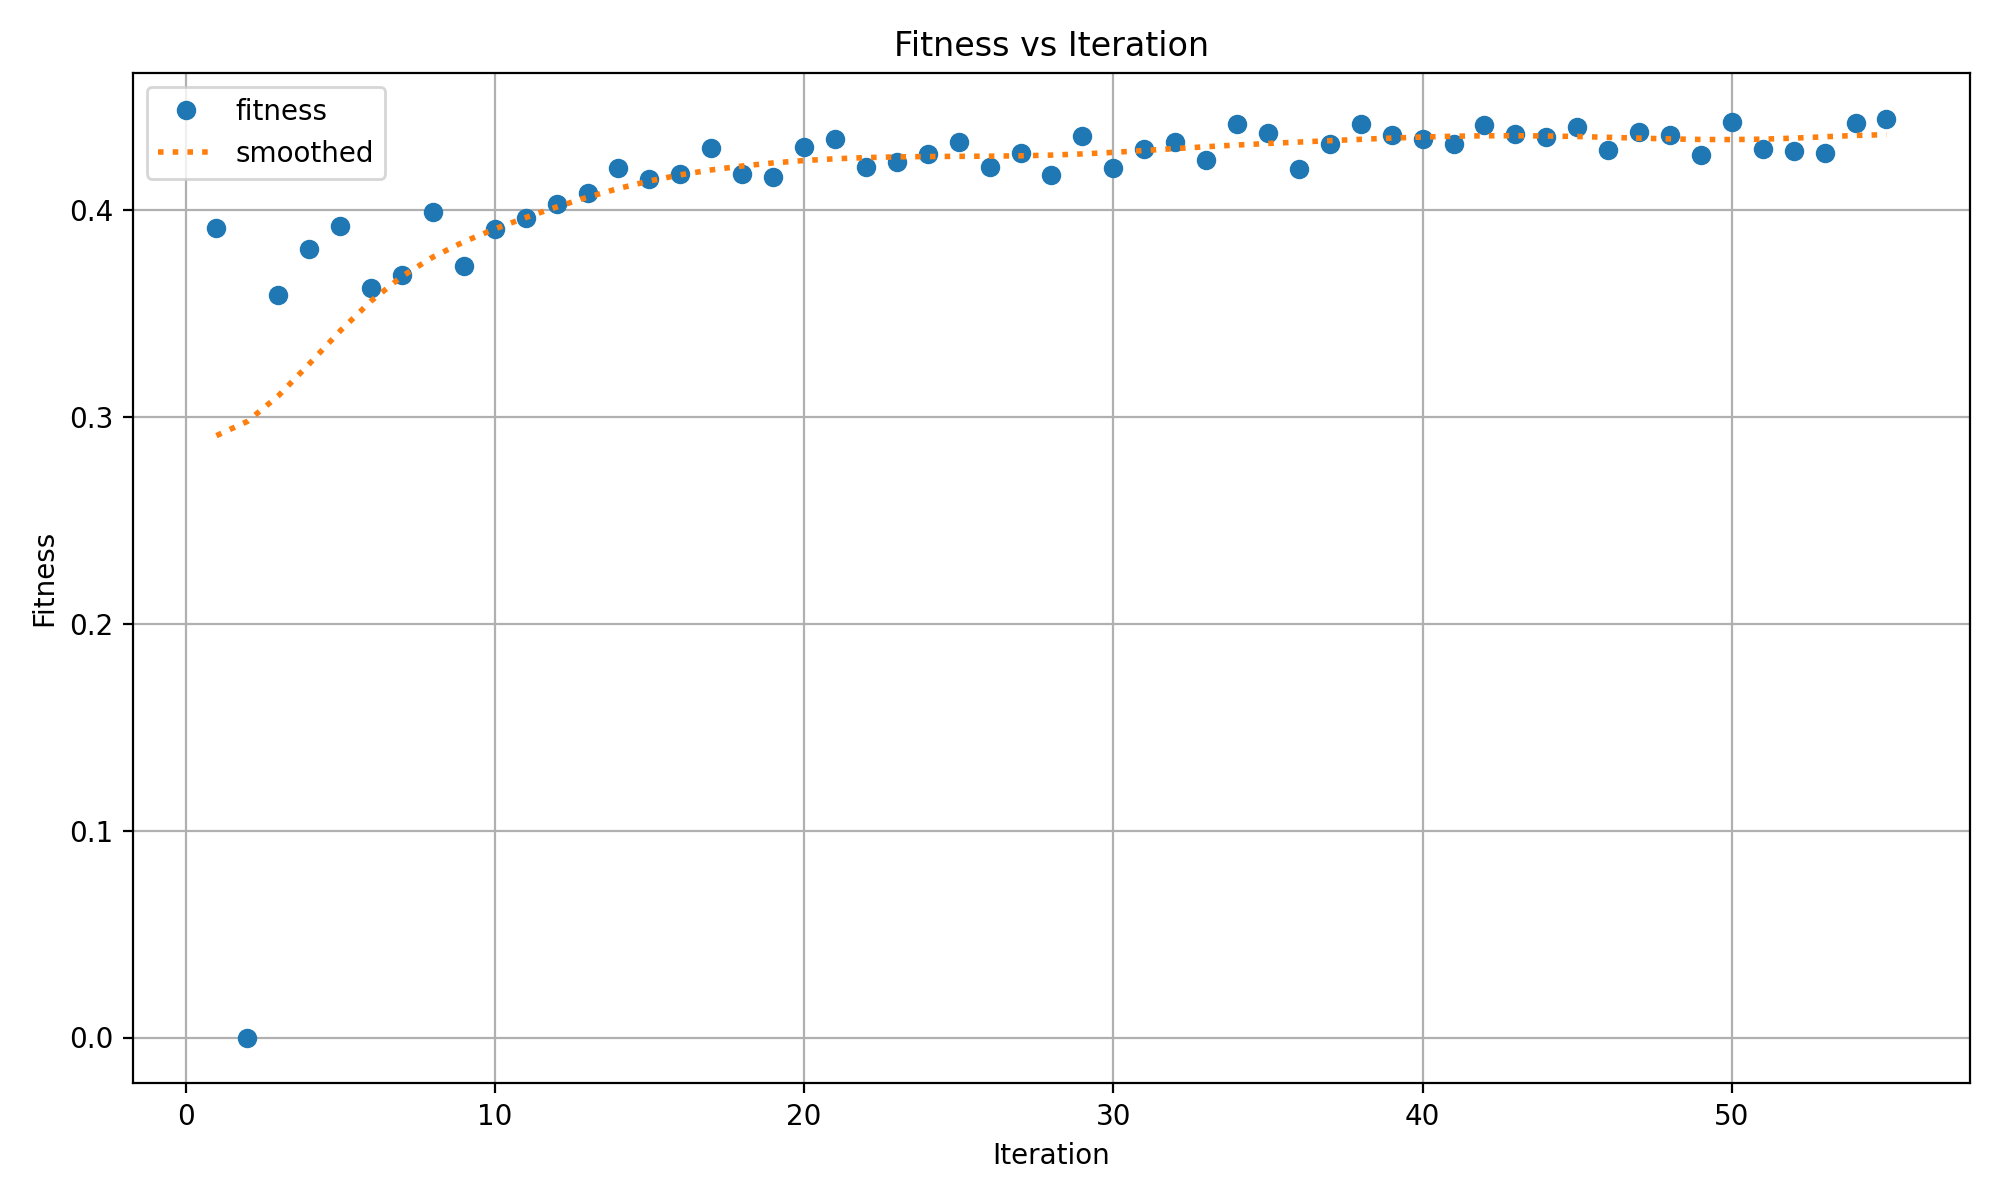

In [9]:
%cd {HOME}
Image(filename=f'./runs/detect/tune3/tune_fitness.png', width=600)

c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local


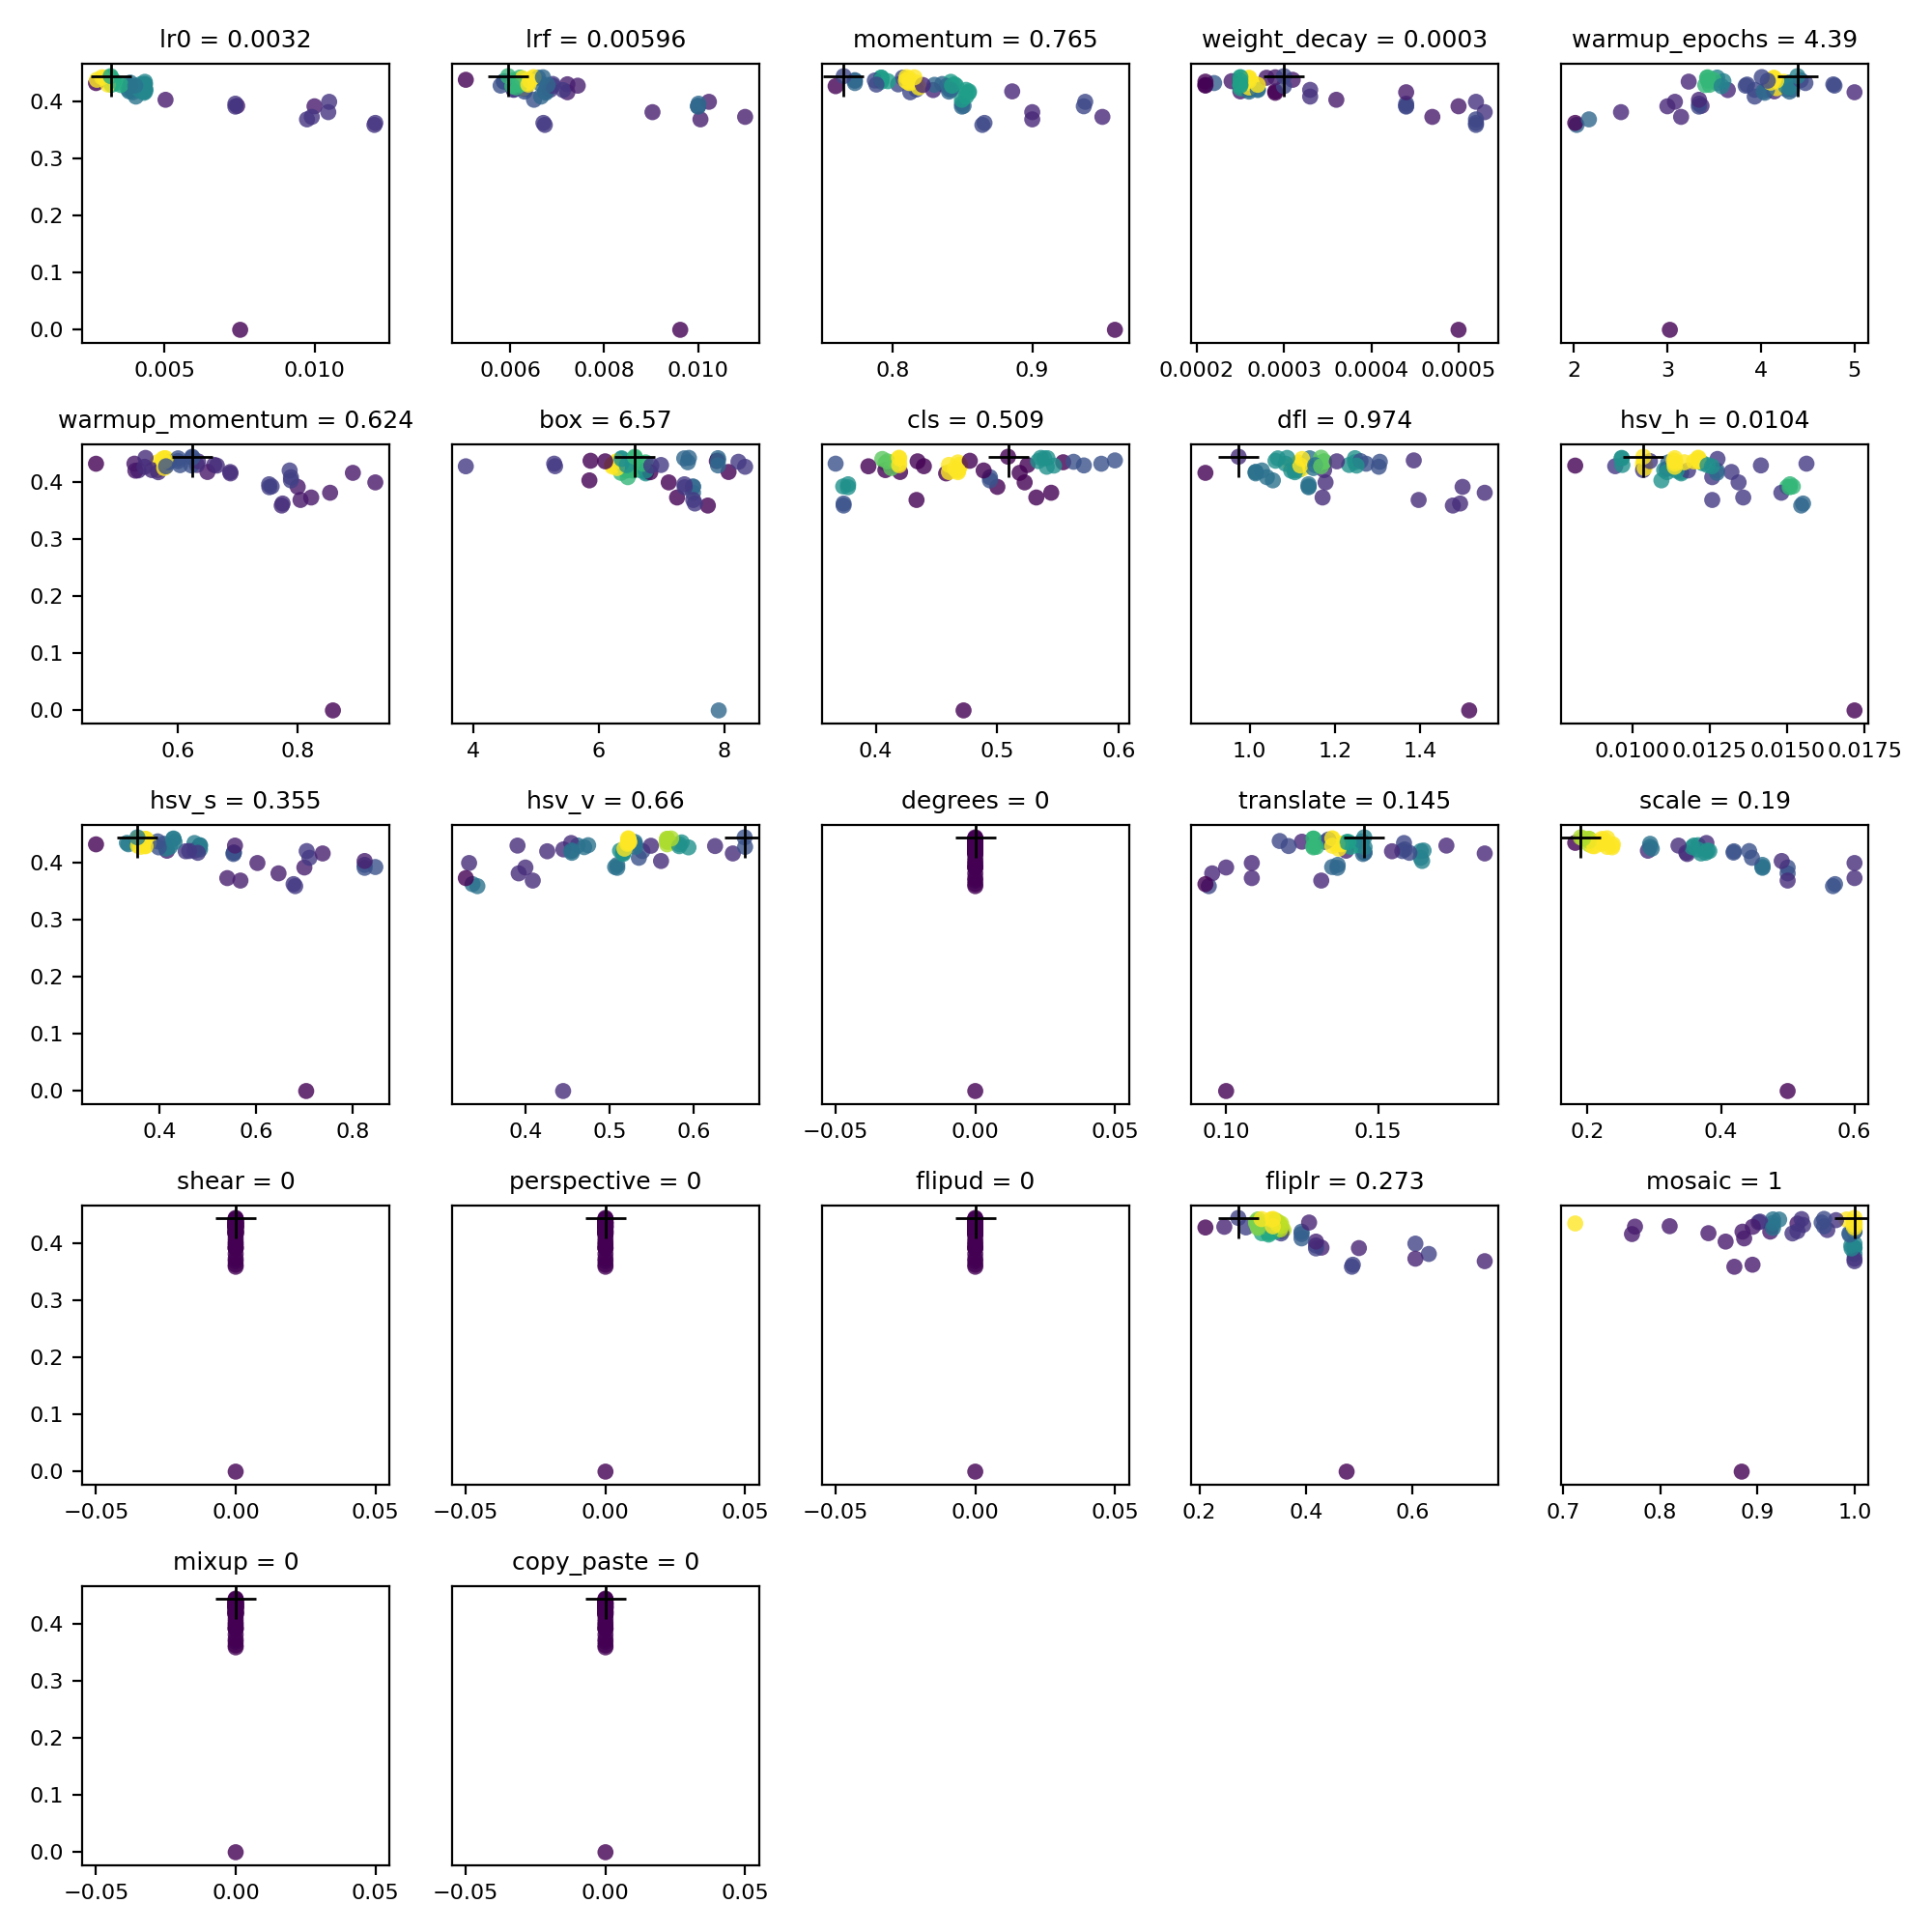

In [10]:
%cd {HOME}
Image(filename=f'./runs/detect/tune3/tune_scatter_plots.png', width=600)